In [1]:
import sqlite3
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getDB(path, name):
    db = sqlite3.connect(os.path.join(path,name))
    return db

def getCursor(db):
    cursor = db.cursor()
    return cursor

In [3]:
path = "/scratch/users/mdelabrassinne/Database"
name = "SoccerDB.db"
db = getDB(path = path, name = name)
cursor = getCursor(db)

In [4]:
## NB of videos
def getNbVideos(cursor):
    cursor.execute("SELECT COUNT(duration) FROM VIDEO")
    tables = cursor.fetchall()
    for table in tables:
        print(table)
    return tables

getNbVideos(cursor)

(1100,)


[(1100,)]

In [14]:
## Analysis on the number and type of actions 
def getNbactions(cursor, action):
    query = 'SELECT COUNT(Label) FROM sequence WHERE label="{action}"'
    cursor.execute(query.format(action=action))
    nbactions = cursor.fetchall()
    for action in nbactions:
        rt = action[0]
        print(action[0])
    return rt

def getNoClassAction(cursor):
    query = """
            SELECT COUNT(Label) 
            FROM sequence 
            WHERE label="Throw-in" OR label="Offside" OR label="Clearance" OR label="Foul" OR label="Substitution"
            OR label="Ball out of play" OR label="Indirect free-kick" OR label="Shots off target" OR label="Shots on target"
            OR label="Direct free-kick"
            """
    cursor.execute(query)
    nbactions = cursor.fetchall()
    for action in nbactions:
        rt = action[0]
        print(action[0])
    return rt

# Type of possible actions
cursor.execute("SELECT DISTINCT Label FROM sequence")
nbactions = cursor.fetchall()
print(nbactions)

# number of actions in the sequence table
goal = getNbactions(cursor, "Goal")
corner = getNbactions(cursor, "Corner")
kick_off = getNbactions(cursor, "Kick-off")
penalty = getNbactions(cursor, "Penalty")
Yellow_card = getNbactions(cursor, "Yellow card")
red_card = getNbactions(cursor, "Red card")
YR_card = getNbactions(cursor, "Yellow->red card")
Throw_in = getNbactions(cursor, "Throw-in")
Offside = getNbactions(cursor, "Offside")
Clearance = getNbactions(cursor, "Clearance")
Foul = getNbactions(cursor, "Foul")
Substitution = getNbactions(cursor, "Substitution")
Ball_out_of_play = getNbactions(cursor, "Ball out of play")
Indirect_free_kick = getNbactions(cursor, "Indirect free-kick")
Shots_off_target = getNbactions(cursor, "Shots off target")
Shots_on_target = getNbactions(cursor, "Shots on target")
Direct_free_kick = getNbactions(cursor, "Direct free-kick")

[('Kick-off',), ('Throw-in',), ('Corner',), ('Offside',), ('Clearance',), ('Goal',), ('Foul',), ('Substitution',), ('Penalty',), ('Ball out of play',), ('Indirect free-kick',), ('Shots off target',), ('Shots on target',), ('Yellow card',), ('Direct free-kick',), ('Yellow->red card',), ('Red card',)]
1690
4199
700
172
1114
34
24
13340
1972
3551
11339
2312
16971
3541
3037
3372
1079


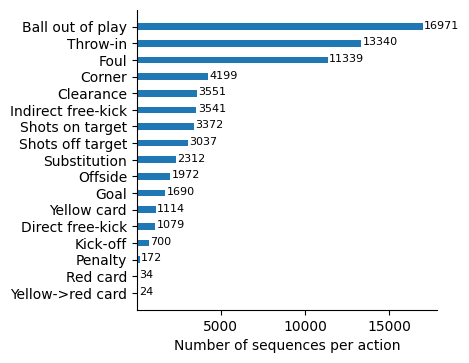

(None,)

In [15]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (3,3))
ax = figure.add_axes([0,0,1,1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

actions    = ['Ball out of play','Throw-in','Foul','Corner','Clearance','Indirect free-kick','Shots on target','Shots off target','Substitution','Offside','Goal','Yellow card','Direct free-kick','Kick-off','Penalty','Red card','Yellow->red card']
action__nb = [Ball_out_of_play  , Throw_in , Foul , corner , Clearance , Indirect_free_kick , Shots_on_target , Shots_off_target , Substitution , Offside , goal , Yellow_card , Direct_free_kick , kick_off , penalty , red_card , YR_card]
ax.barh(actions, action__nb, align='center', height = 0.4,  left=10,)

for i, v in enumerate(action__nb):
    ax.text(v + 100, i + .1, str(v), color='black', fontsize = 8)#, fontweight='bold')
ax.invert_yaxis()
ax.set_xlabel("Number of sequences per action")

plt.savefig("Sequence_Number.pdf", bbox_inches='tight')

plt.show(),

In [12]:
## Nomber of images per actions that we have

def getImageAction(cursor, action):
    query = """SELECT SUM(NumberOfImages) FROM sequence 
                WHERE label="{action}"
            """
    cursor.execute(query.format(action=action))
    nbactions = cursor.fetchall()
    for action in nbactions:
        rt = action[0]
        print(action[0])
    return rt

def getImageNoClass(cursor):
    query = """
            SELECT SUM(NumberOfImages)
            FROM sequence 
            WHERE label="Throw-in" OR label="Offside" OR label="Clearance" OR label="Foul" OR label="Substitution"
            OR label="Ball out of play" OR label="Indirect free-kick" OR label="Shots off target" OR label="Shots on target"
            OR label="Direct free-kick"
            """
    cursor.execute(query)
    nbactions = cursor.fetchall()
    for action in nbactions:
        rt = action[0]
        print('NoClass = ', action[0])
    return rt

goal = getImageAction(cursor, "Goal")
corner = getImageAction(cursor, "Corner")
kick_off = getImageAction(cursor, "Kick-off")
penalty = getImageAction(cursor, "Penalty")
Yellow_card = getImageAction(cursor, "Yellow card")
red_card = getImageAction(cursor, "Red card")
YR_card = getImageAction(cursor, "Yellow->red card")
Throw_in = getImageAction(cursor, "Throw-in")
Offside = getImageAction(cursor, "Offside")
Clearance = getImageAction(cursor, "Clearance")
Foul = getImageAction(cursor, "Foul")
Substitution = getImageAction(cursor, "Substitution")
Ball_out_of_play = getImageAction(cursor, "Ball out of play")
Indirect_free_kick = getImageAction(cursor, "Indirect free-kick")
Shots_off_target = getImageAction(cursor, "Shots off target")
Shots_on_target = getImageAction(cursor, "Shots on target")
Direct_free_kick = getImageAction(cursor, "Direct free-kick")

42250
104975
17500
4300
27850
850
600


KeyboardInterrupt: 

In [6]:
SUM = goal + corner + kick_off + penalty+Yellow_card+red_card+YR_card+Offside+Throw_in+Clearance+Foul+Substitution+Ball_out_of_play+Indirect_free_kick+Shots_off_target+Shots_on_target+Direct_free_kick
print("Ball_out_of_play", Ball_out_of_play/SUM * 100)
print("YR_card", YR_card / SUM * 100)

Ball_out_of_play 24.794712761499795
YR_card 0.03506436356134715


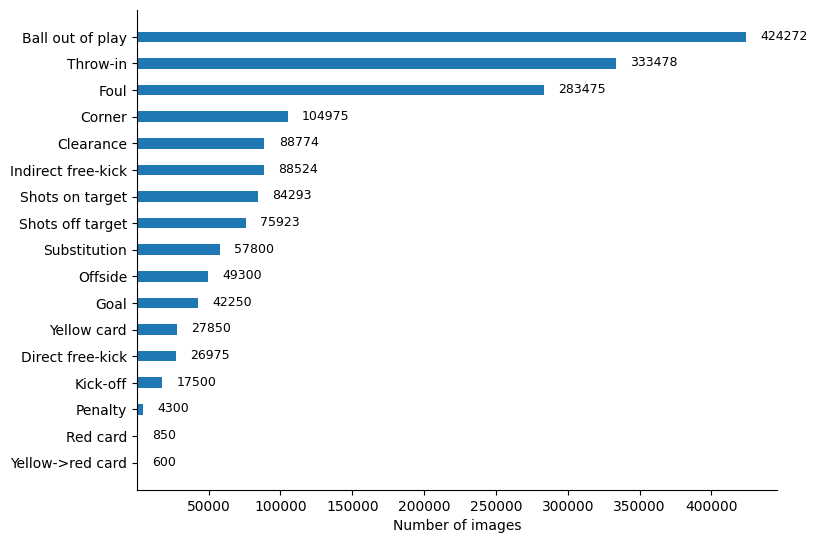

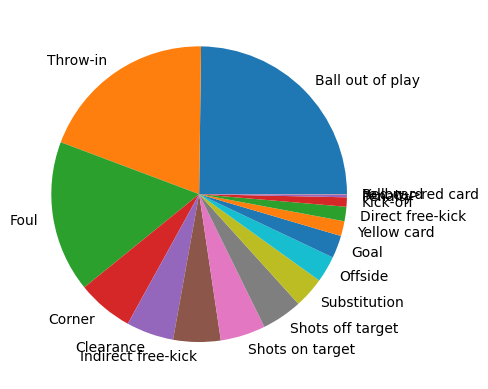

In [29]:
## PLOT nb of images for each type of action
import matplotlib.pyplot as plt
figure = plt.figure()#figsize = (3,3))
ax = figure.add_axes([0,0,1,1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

actions    = ['Ball out of play','Throw-in','Foul','Corner','Clearance','Indirect free-kick','Shots on target','Shots off target','Substitution','Offside','Goal','Yellow card','Direct free-kick','Kick-off','Penalty','Red card','Yellow->red card']
action__nb = [Ball_out_of_play  , Throw_in , Foul , corner , Clearance , Indirect_free_kick , Shots_on_target , Shots_off_target , Substitution , Offside , goal , Yellow_card , Direct_free_kick , kick_off , penalty , red_card , YR_card]
ax.barh(actions, action__nb, align='center', height = 0.4,  left= 13, )
for i, v in enumerate(action__nb):
    ax.text(v + 10000, i + .1, str(v), color='black', fontsize = 9)#, fontweight='bold')
ax.invert_yaxis()

ax.set_xlabel("Number of images")

plt.savefig("Images_Number.pdf", bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
ax.pie(action__nb, labels=actions)

plt.savefig("Images_Number_Pie.pdf", bbox_inches='tight')
plt.show()

In [4]:
## NUMBER of VIDEO with LABEL
query = "SELECT DISTINCT VideoPath FROM sequence"
cursor.execute(query)
nbactions = cursor.fetchall()
count = 0
nbHalh = 0
for action in nbactions:
    nbHalh += 1
    if "2_224p" in action[0]:
        count += 1
print(count)
print(nbHalh)

495
994


In [15]:
## Nombre de 'action' par mis temps
def actionPerHalfTime(cursor, action, nb):
    query = f"""
            SELECT COUNT(label) FROM sequence 
            WHERE label="{action}"
            GROUP BY VideoPath
            """
    cursor.execute(query)
    nbactions = cursor.fetchall()
    tab = np.zeros((nb))
    i = 0
    for action in nbactions:
        tab[i] = action[0]
        i += 1
    print(len(nbactions), sum(tab))
    return tab

nb = 994

goal = actionPerHalfTime(cursor, "Goal", nb)
corner = actionPerHalfTime(cursor, "Corner",nb)
kick_off = actionPerHalfTime(cursor, "Kick-off", nb)
penalty = actionPerHalfTime(cursor, "Penalty",nb)
Yellow_card = actionPerHalfTime(cursor, "Yellow card", nb)
red_card = actionPerHalfTime(cursor, "Red card", nb)
YR_card = actionPerHalfTime(cursor, "Yellow->red card", nb)
Throw_in = actionPerHalfTime(cursor, "Throw-in", nb)
Offside = actionPerHalfTime(cursor, "Offside", nb)
Clearance = actionPerHalfTime(cursor, "Clearance", nb)
Foul = actionPerHalfTime(cursor, "Foul", nb)
Substitution = actionPerHalfTime(cursor, "Substitution", nb)
Ball_out_of_play = actionPerHalfTime(cursor, "Ball out of play", nb)
Indirect_free_kick = actionPerHalfTime(cursor, "Indirect free-kick", nb)
Shots_off_target = actionPerHalfTime(cursor, "Shots off target", nb)
Shots_on_target = actionPerHalfTime(cursor, "Shots on target", nb)
Direct_free_kick = actionPerHalfTime(cursor, "Direct free-kick", nb)

797 1690.0
976 4199.0
536 700.0
159 172.0
452 1114.0
32 34.0
23 24.0
994 13340.0
815 1972.0
941 3551.0
994 11339.0
596 2312.0
561 16971.0
531 3541.0
554 3037.0
556 3372.0
461 1079.0


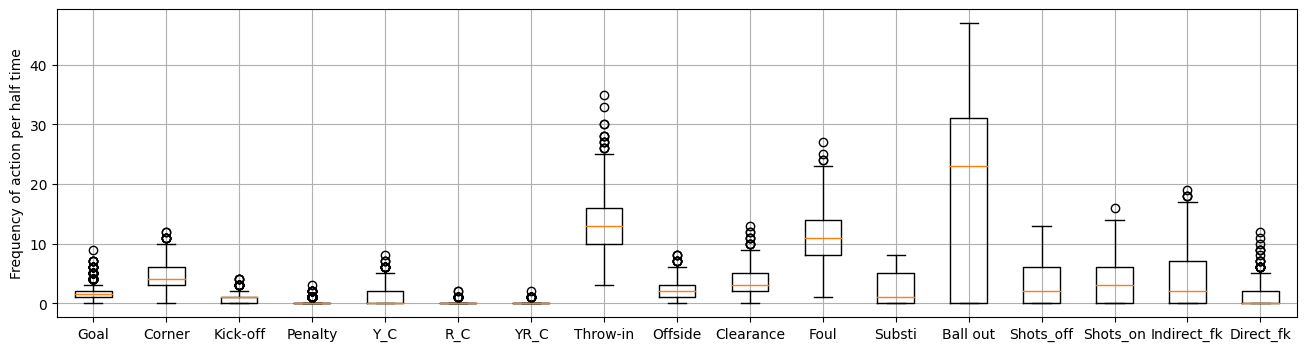

In [16]:
## PLOT
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (16,4))
ax = plt.axes()

actions = ['Goal','Corner', 'Kick-off','Penalty', 'Y_C', 'R_C' , 'YR_C', 'Throw-in', 'Offside', 'Clearance', 'Foul', 'Substi', 'Ball out', 'Shots_off', 'Shots_on','Indirect_fk', 'Direct_fk']
data = [goal, corner, kick_off, penalty, Yellow_card, red_card , YR_card, Throw_in, Offside, Clearance, Foul, Substitution, Ball_out_of_play, Shots_off_target, Shots_on_target, Indirect_free_kick, Direct_free_kick]

ax.boxplot(data)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], actions)
ax.set_ylabel('Frequency of action per half time')

ax.grid()

plt.savefig("Freqeuncy_action.pdf", bbox_inches='tight')
plt.show()


In [14]:
query = "SELECT DISTINCT training_stage FROM video"
cursor.execute(query)
nbactions = cursor.fetchall()
for action in nbactions:
    print(action[0])

Training
Validation
Test


In [52]:
### Compared between test/validation/training set   AND training_stage ="Training"

def getNbactionsSETS(cursor, action):
    query = """
            SELECT COUNT(Label) FROM sequence 
            INNER JOIN video 
            WHERE sequence.label="{action}" AND video.training_stage = 'Training'"""
    cursor.execute(query.format(action=action))
    nbactions = cursor.fetchall()
    for action in nbactions:
        rt = action[0]
        print(action[0])
    return rt

# number of actions in the sequence table
goal = getNbactionsSETS(cursor, "Goal")

#corner = getNbactionsSETS(cursor, "Corner")
#kick_off = getNbactionsSETS(cursor, "Kick-off")
#penalty = getNbactionsSETS(cursor, "Penalty")
#Yellow_card = getNbactionsSETS(cursor, "Yellow card")
#red_card = getNbactionsSETS(cursor, "Red card")
#YR_card = getNbactionsSETS(cursor, "Yellow->red card")

#cards = Yellow_card + red_card + YR_card

1352000


In [17]:
### TIME line of the different actions
def getTimeAction(cursor, action):
    query = f"""
            SELECT StartTime FROM sequence 
            WHERE label="{action}"
            """
    cursor.execute(query.format(action=action))
    nbactions = cursor.fetchall()
    tab = np.zeros((len(nbactions)))
    i = 0
    for action in nbactions:
        tab[i] = action[0]
        i += 1
    return np.sort(tab/60)

def getTimeActionCard(cursor):
    query = f"""
        SELECT StartTime FROM sequence 
        WHERE label='Yellow card' OR label='Red card' or label='Yellow->red card'
        """
    cursor.execute(query)
    nbactions = cursor.fetchall()
    tab = np.zeros((len(nbactions)))
    i = 0
    for action in nbactions:
        tab[i] = action[0]
        i += 1  
    return np.sort(tab/60)

goal = getTimeAction(cursor, "Goal")
corner = getTimeAction(cursor, "Corner")
kick_off = getTimeAction(cursor, "Kick-off")
penalty = getTimeAction(cursor, "Penalty")  
Yellow_card = getTimeAction(cursor, "Yellow card")
red_card = getTimeAction(cursor, "Red card")
YR_card = getTimeAction(cursor, "Yellow->red card")
Throw_in = getTimeAction(cursor, "Throw-in")
Offside = getTimeAction(cursor, "Offside")
Clearance = getTimeAction(cursor, "Clearance")
Foul = getTimeAction(cursor, "Foul")
Substitution = getTimeAction(cursor, "Substitution")
Ball_out_of_play = getTimeAction(cursor, "Ball out of play")
Indirect_free_kick = getTimeAction(cursor, "Indirect free-kick")
Shots_off_target = getTimeAction(cursor, "Shots off target")
Shots_on_target = getTimeAction(cursor, "Shots on target")
Direct_free_kick = getTimeAction(cursor, "Direct free-kick")

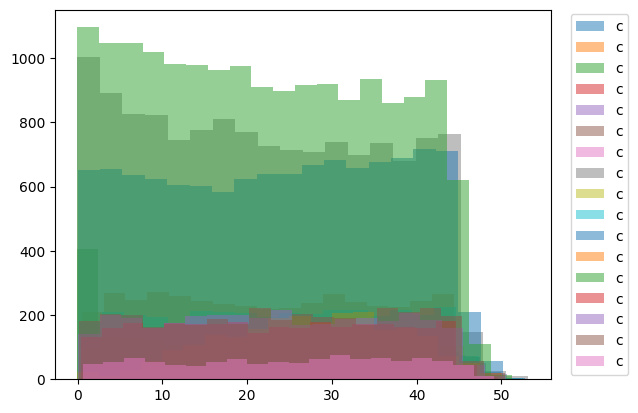

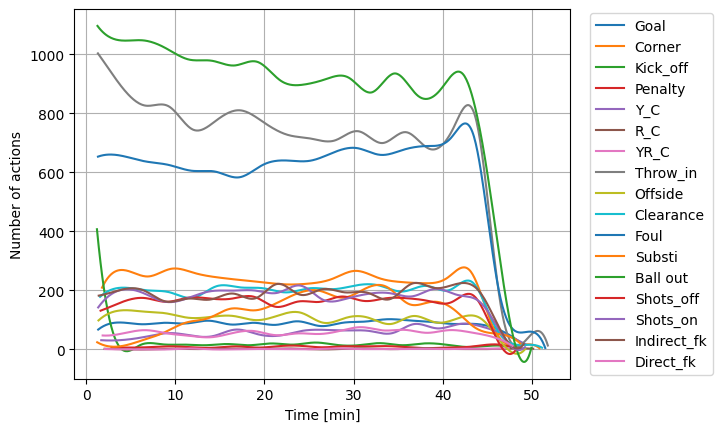

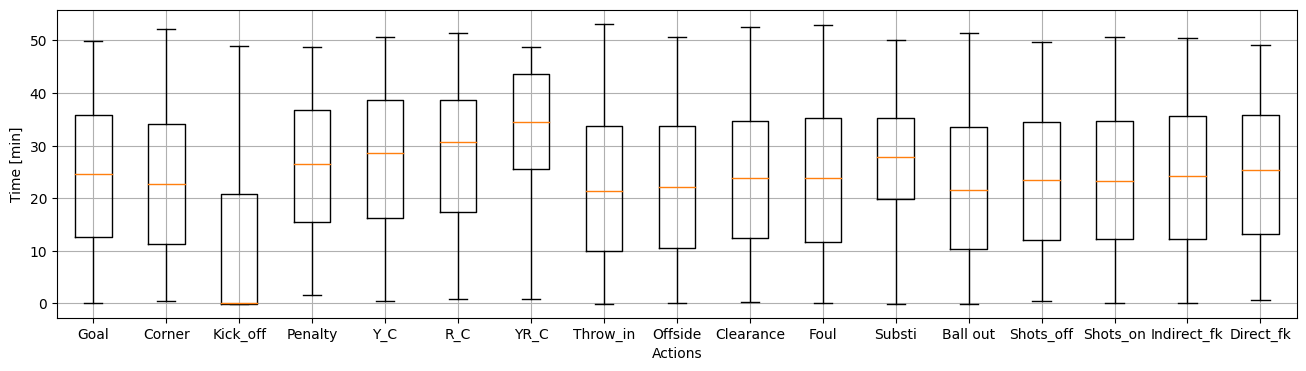

In [18]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

def get_interpolate(x, y):
    cs = CubicSpline(x, y)
    xs = np.arange(x.min(), x.max(), 0.1)
    cs = cs(xs)
    return xs, cs

actions = [goal, corner, kick_off, penalty, Yellow_card, red_card , YR_card, Throw_in, Offside, Clearance, Foul, Substitution, Ball_out_of_play,  Shots_off_target, Shots_on_target, Indirect_free_kick,Direct_free_kick]
Lables = ['Goal', 'Corner', 'Kick_off', 'Penalty', 'Y_C', 'R_C', 'YR_C', 'Throw_in', 'Offside', 'Clearance', 'Foul', 'Substi', 'Ball out', 'Shots_off', 'Shots_on', 'Indirect_fk','Direct_fk']
n = []
x = []

figure = plt.figure()
ax = plt.axes()
b = 20
for action in actions:
    ni,xi,_ = ax.hist(action, alpha=0.5,bins = b, label='c')
    n.append(ni)
    x.append(xi)
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()


figure = plt.figure()#figsize = (5,3))
ax = plt.axes()

for i in range(len(actions)):
    xi = x[i]
    bin_centers = 0.5*(xi[1:]+xi[:-1])
    xs, cs = get_interpolate(bin_centers, n[i])
    ax.plot(xs,cs, label=Lables[i])
    
ax.set_xlabel("Time [min]")    
ax.set_ylabel("Number of actions")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid()

plt.savefig("Stat_action.pdf", bbox_inches='tight')
plt.show()

#Boxplot
figure = plt.figure(figsize = (16,4))
ax = plt.axes()
ax.boxplot(actions)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], Lables)
ax.set_ylabel("Time [min]")    
ax.set_xlabel("Actions")

plt.grid()
plt.savefig("Stat_action_Boxplot.pdf", bbox_inches='tight')
plt.show()


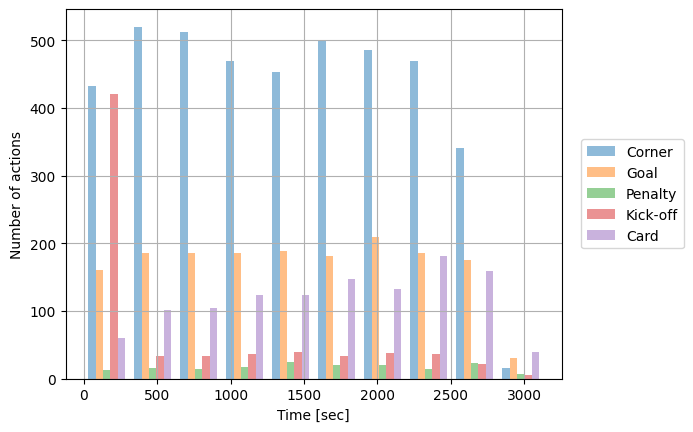

In [42]:
import matplotlib.pyplot as plt
figure = plt.figure()
ax = plt.axes()

b = 10

ax.hist([corner, goal, penalty, kick_off, cards], alpha=0.5,bins = b, label=['Corner', 'Goal', 'Penalty', 'Kick-off', 'Card'])
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Number of actions")

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid()
plt.show()


In [4]:
## NB frames per second
query = "SELECT DISTINCT fps FROM video"
cursor.execute(query)
nbactions = cursor.fetchall()
for action in nbactions:
    print(action[0])

25
